In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
cust_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_customers_dataset.csv')
geolocation_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_geolocation_dataset.csv')
order_item_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_order_items_dataset.csv')
payment_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_order_payments_dataset.csv')
order_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_orders_dataset.csv')
products_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_products_dataset.csv')
sellers_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_sellers_dataset.csv')
review_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_order_reviews_dataset.csv')



In [3]:
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
cust_df.isnull().sum()
#Customer data got no null value 

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
cust_df.duplicated().sum()


0

In [7]:
cust_df.duplicated(['customer_unique_id']).sum()
#Repeated buyer 

3345

In [8]:
top_cust = cust_df.groupby("customer_unique_id")[["customer_unique_id"]].count()
print(top_cust)

top_cust.rename(columns={'customer_unique_id': 'Number_of_Purchases'}, inplace=True)
top_cust.head()

                                  customer_unique_id
customer_unique_id                                  
0000366f3b9a7992bf8c76cfdf3221e2                   1
0000b849f77a49e4a4ce2b2a4ca5be3f                   1
0000f46a3911fa3c0805444483337064                   1
0000f6ccb0745a6a4b88665a16c9f078                   1
0004aac84e0df4da2b147fca70cf8255                   1
...                                              ...
fffcf5a5ff07b0908bd4e2dbc735a684                   1
fffea47cd6d3cc0a88bd621562a9d061                   1
ffff371b4d645b6ecea244b27531430a                   1
ffff5962728ec6157033ef9805bacc48                   1
ffffd2657e2aad2907e67c3e9daecbeb                   1

[96096 rows x 1 columns]


,Number_of_Purchases
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1


Repeated buyer, we can do an analysis on repeated buyer behaviour and implement it on other buyer 

In [11]:
top_cust_sort = top_cust.sort_values(by='Number_of_Purchases',ascending=False)
top_cust_sort[:10] 

,Number_of_Purchases
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
12f5d6e1cbf93dafd9dcc19095df0b3d,6
de34b16117594161a6a89c50b289d35a,6
63cfc61cee11cbe306bff5857d00bfe4,6
f0e310a6839dce9de1638e0fe5ab282a,6


In [22]:
top_cust_sort

                                  Number_of_Purchases
customer_unique_id                                   
8d50f5eadf50201ccdcedfb9e2ac8455                   17
3e43e6105506432c953e165fb2acf44c                    9
6469f99c1f9dfae7733b25662e7f1782                    7
ca77025e7201e3b30c44b472ff346268                    7
1b6c7548a2a1f9037c1fd3ddfed95f33                    7
...                                               ...
5657dfebff5868c4dc7e8355fea865c4                    1
5657596addb4d7b07b32cd330614bdf8                    1
5656eb169546146caeab56c3ffc3d268                    1
5656a8fabc8629ff96b2bc14f8c09a27                    1
ffffd2657e2aad2907e67c3e9daecbeb                    1

[96096 rows x 1 columns]


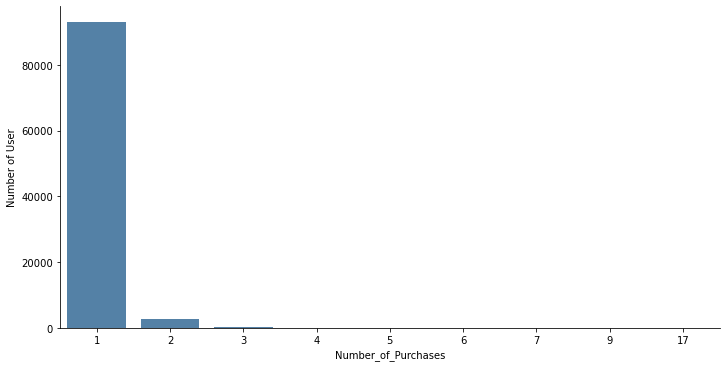

In [63]:
j = sns.catplot(x="Number_of_Purchases", data=top_cust,aspect=2, kind="count", color='steelblue')
j.set_ylabels("Number of User")
j.set_xticklabels(step=1)

In [45]:
#struck at this need to redo
buyer_1 = top_cust_sort[top_cust_sort['Number_of_Purchases']==1].count()
buyer_2 = top_cust_sort[top_cust_sort['Number_of_Purchases']==2].count()
buyer_3 = top_cust_sort[top_cust_sort['Number_of_Purchases']==3].count()
buyer_4 = top_cust_sort[top_cust_sort['Number_of_Purchases']==4].count()
buyer_5 = top_cust_sort[top_cust_sort['Number_of_Purchases']==5].count()
buyer_6 = top_cust_sort[top_cust_sort['Number_of_Purchases']==6].count()
buyer_7 = top_cust_sort[top_cust_sort['Number_of_Purchases']==7].count()
buyer_9 = top_cust_sort[top_cust_sort['Number_of_Purchases']==9].count()
buyer_17 = top_cust_sort[top_cust_sort['Number_of_Purchases']==17].count()

print("Customers that purchase item from the website 1 time: %d" %buyer_1)
print("Customers that purchase item from the website 2 times: %d" %buyer_2)
print("Customers that purchase item from the website 3 times: %d" %buyer_3)
print("Customers that purchase item from the website 4 times: %d" %buyer_4)
print("Customers that purchase item from the website 5 times: %d" %buyer_5)
print("Customers that purchase item from the website 6 times: %d" %buyer_6)
print("Customers that purchase item from the website 7 times: %d" %buyer_7)
print("Customers that purchase item from the website 9 times: %d" %buyer_9)
print("Customers that purchase item from the website 17 times: %d" %buyer_17)


Customers that purchase item from the website 1 time: 93099
Customers that purchase item from the website 2 times: 2745
Customers that purchase item from the website 3 times: 203
Customers that purchase item from the website 4 times: 30
Customers that purchase item from the website 5 times: 8
Customers that purchase item from the website 6 times: 6
Customers that purchase item from the website 7 times: 3
Customers that purchase item from the website 9 times: 1
Customers that purchase item from the website 17 times: 1


In [18]:
#why customers will purchase so many times and how i can push for me customer to purchase online 

Number_of_Purchases    96096
dtype: int64

In [5]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [37]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [38]:
geolocation_df.duplicated().sum()
# It should be buyer getting products from the same area 
# when merge the file together we can plot the graph

261831

To continue, check how to use the geolocation_lat and geolocation_lng to find out the distance between seller and buyer 

In [7]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [39]:
order_item_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [40]:
order_item_df.duplicated().sum()

0

In [27]:
order_item_df.duplicated(['seller_id']).sum()

109555

In [32]:
seller_order_item_df = order_item_df.groupby("seller_id")[["seller_id"]].count()
print(seller_order_item_df)

seller_order_item_df.rename(columns={'seller_id': 'Num_customer_purchase_from_seller'}, inplace=True)
seller_order_item_df.head()

                                  seller_id
seller_id                                  
0015a82c2db000af6aaaf3ae2ecb0532          3
001cca7ae9ae17fb1caed9dfb1094831        239
001e6ad469a905060d959994f1b41e4f          1
002100f778ceb8431b7a1020ff7ab48f         55
003554e2dce176b5555353e4f3555ac8          1
...                                     ...
ffcfefa19b08742c5d315f2791395ee5          1
ffdd9f82b9a447f6f8d4b91554cc7dd3         20
ffeee66ac5d5a62fe688b9d26f83f534         14
fffd5413c0700ac820c7069d66d98c89         61
ffff564a4f9085cd26170f4732393726         20

[3095 rows x 1 columns]


,Num_customer_purchase_from_seller
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,3
001cca7ae9ae17fb1caed9dfb1094831,239
001e6ad469a905060d959994f1b41e4f,1
002100f778ceb8431b7a1020ff7ab48f,55
003554e2dce176b5555353e4f3555ac8,1


In [31]:
seller_order_item_df_sort = seller_order_item_df.sort_values(by='Num_customer_purchase_from_seller',ascending=False)
seller_order_item_df_sort[:10] 

,Num_customer_purchase_from_seller
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
955fee9216a65b617aa5c0531780ce60,1499
1025f0e2d44d7041d6cf58b6550e0bfa,1428
7c67e1448b00f6e969d365cea6b010ab,1364
ea8482cd71df3c1969d7b9473ff13abc,1203


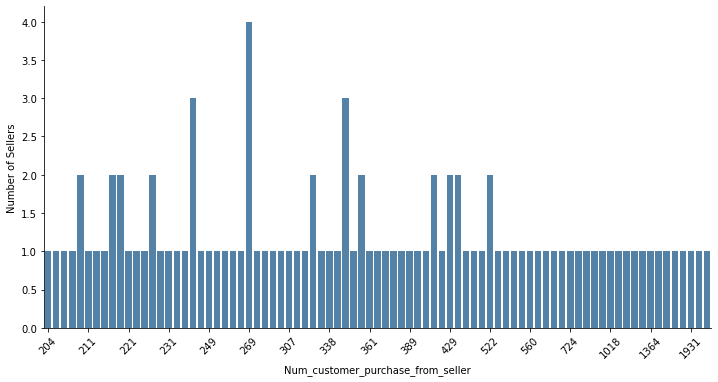

In [40]:
s = sns.catplot(x="Num_customer_purchase_from_seller", data=seller_order_item_df_sort[:100],aspect=2, kind="count", color='steelblue', )
s.set_ylabels("Number of Sellers")
s.set_xticklabels(step=5, rotation=45)

When merge file together, check out the products thats sell wells with the 

In [9]:
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [41]:
payment_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [42]:
payment_df.duplicated().sum()

0

In [46]:
payment_df['payment_type'].nunique()

5

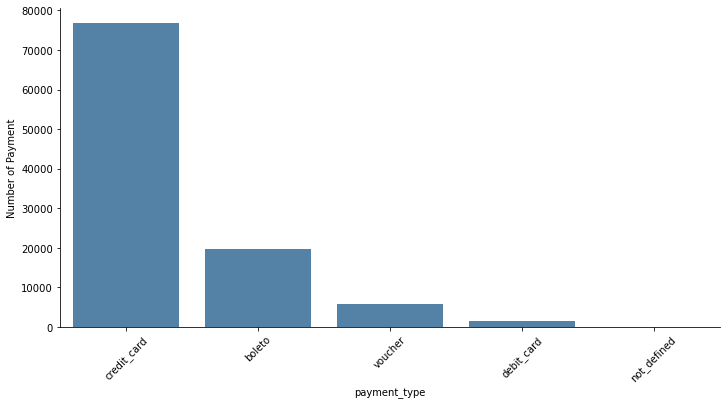

In [54]:
p = sns.catplot(x="payment_type", data=payment_df,aspect=2, kind="count", color='steelblue', )
p.set_ylabels("Number of Payment")
p.set_xticklabels(step=1, rotation=45)

In [ ]:
# credit_card_df = top_cust_sort[top_cust_sort['Number_of_Purchases']==1].count()
# boleto_df = top_cust_sort[top_cust_sort['Number_of_Purchases']==2].count()
# buyer_3 = top_cust_sort[top_cust_sort['Number_of_Purchases']==3].count()
# buyer_4 = top_cust_sort[top_cust_sort['Number_of_Purchases']==4].count()
# buyer_5 = top_cust_sort[top_cust_sort['Number_of_Purchases']==5].count()

In [11]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [43]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
order_df.duplicated().sum()

In [13]:

products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:

sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [17]:

review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [19]:
category_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\product_category_name_translation.csv')
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [20]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [21]:
# replace the category name 

category_df['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [22]:
len(category_df['product_category_name'])

71

In [23]:
len(category_df['product_category_name_english'])

71

In [24]:
category_df['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [25]:
products_df['product_category_name'] = products_df['product_category_name'].replace(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'moveis_sala',
       'construcao_ferramentas_iluminacao',
       'industria_comercio_e_negocios', 'alimentos', 'artes',
       'moveis_quarto', 'livros_interesse_geral',
       'construcao_ferramentas_seguranca',
       'fashion_underwear_e_moda_praia', 'fashion_esporte',
       'sinalizacao_e_seguranca', 'pcs', 'artigos_de_natal',
       'fashion_roupa_feminina', 'eletrodomesticos_2',
       'livros_importados', 'bebidas', 'cine_foto', 'la_cuisine',
       'musica', 'casa_conforto_2', 'portateis_casa_forno_e_cafe',
       'cds_dvds_musicais', 'dvds_blu_ray', 'flores',
       'artes_e_artesanato', 'fraldas_higiene',
       'fashion_roupa_infanto_juvenil', 'seguros_e_servicos'],
                                                                                    ['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'industry_commerce_and_business', 'food', 'art',
       'furniture_bedroom', 'books_general_interest',
       'construction_tools_safety', 'fashion_underwear_beach',
       'fashion_sport', 'signaling_and_security', 'computers',
       'christmas_supplies', 'fashio_female_clothing',
       'home_appliances_2', 'books_imported', 'drinks', 'cine_photo',
       'la_cuisine', 'music', 'home_comfort_2',
       'small_appliances_home_oven_and_coffee', 'cds_dvds_musicals',
       'dvds_blu_ray', 'flowers', 'arts_and_craftmanship',
       'diapers_and_hygiene', 'fashion_childrens_clothes',
       'security_and_services'])

In [26]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
#merge into 1 data file 

ecommerce_df = order_item_df.merge(order_df, on='order_id', how='outer')
ecommerce_df = ecommerce_df.merge(payment_df, on='order_id', how='outer')
ecommerce_df = ecommerce_df.merge(products_df, on='product_id', how='outer')
ecommerce_df = ecommerce_df.merge(review_df, on='order_id', how='outer')
ecommerce_df = ecommerce_df.merge(cust_df, on='customer_id', how='outer')
ecommerce_df = ecommerce_df.merge(sellers_df, on='seller_id', how='outer')
ecommerce_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277.0,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277.0,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277.0,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277.0,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277.0,volta redonda,SP


In [28]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   customer_id                    119143 non-null  object 
 8   order_status                   119143 non-null  object 
 9   order_purchase_timestamp       119143 non-null  object 
 10  order_approved_at              118966 non-null  object 
 11  order_delivered_carrier_date   117057 non-null  object 
 12  order_delivered_customer_date 

In [29]:
ecommerce_df.shape

(119143, 39)

In [30]:
ecommerce_df.nunique()

order_id                         99441
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
payment_sequential                  29
payment_type                         5
payment_installments                24
payment_value                    29077
product_category_name               73
product_name_lenght                 66
product_description_lenght        2960
product_photos_qty                  19
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm         

In [31]:
ecommerce_df.isnull().sum()

order_id                              0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853


In [32]:
# start to remove na value 
# Checking product_id column 
null_productid = pd.isnull(ecommerce_df['product_id'])
pd.set_option('display.max_columns', None)
ecommerce_df[null_productid]
# all these filling data is due to order_status that is not available or order cancel 
# #order_item_id                       833
# product_id                          833
# seller_id                           833
# shipping_limit_date                 833
# price                               833
# freight_value                       833
# seller_zip_code_prefix              833
# seller_city                         833
# seller_state                        833


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
118310,8e24261a7e58791d10cb1bf9da94df5c,NaN,NaN,NaN,NaN,NaN,NaN,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7fb04ba6e8b915c62557517d5c1e04ee,1.0,NaN,Anunciam um produto que não tem em estoque e a...,2017-12-07 00:00:00,2017-12-11 10:37:57,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,NaN,NaN,NaN
118311,c272bcd21c287498b4883c7512019702,NaN,NaN,NaN,NaN,NaN,NaN,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,NaN,2018-02-18 00:00:00,2018-02-20 19:23:56,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,NaN,NaN,NaN
118312,37553832a3a89c9b2db59701c357ca67,NaN,NaN,NaN,NaN,NaN,NaN,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,NaN,Até hoje não recebi meu produto e nem uma resp...,2017-09-10 00:00:00,2017-09-12 17:00:15,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,NaN,NaN,NaN
118313,d57e15fb07fd180f06ab3926b39edcd2,NaN,NaN,NaN,NaN,NaN,NaN,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,519e62c42f33dce5b47ffddf9fde28df,1.0,NaN,Não compre,2018-02-09 00:00:00,2018-02-09 03:22:43,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA,NaN,NaN,NaN
118314,00b1cb0320190ca0daa2c88b35206009,NaN,NaN,NaN,NaN,NaN,NaN,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,1.0,not_defined,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9c0d840dfe562debfa52a1792bd64bff,1.0,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...,2018-08-28 00:00:00,2018-08-28 18:25:55,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,aaab15da689073f8f9aa978a390a69d1,NaN,NaN,NaN,NaN,NaN,NaN,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,1.0,boleto,1.0,210.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396e26da77b10734f3f8b5d5515fef4e,1.0,NaN,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA...",2018-02-09 00:00:00,2018-02-09 10:12:45,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN,NaN,NaN
119139,3a3cddda5a7c27851bd96c3313412840,NaN,NaN,NaN,NaN,NaN,NaN,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,1.0,voucher,1.0,63.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16d3db296c46b4411dfc5f8bde882e6d,5.0,NaN,NaN,2018-07-24 00:00:00,2018-07-25 16:26:05,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,NaN,NaN,NaN
119140,a89abace0dcc01eeb267a9660b5ac126,NaN,NaN,NaN,NaN,NaN,NaN,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,1.0,voucher,1.0,107.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,047fd109ced39e02296f6aeb74f6a6f1,4.0,NaN,NaN,2018-07-31 00:00:00,2018-08

In [33]:
# Check all the rows that  order status is unavailable / canceled 
#fail_order_status = []
fail_order_status = (ecommerce_df['order_status'] == "unavailable") #| (ecommerce_df['order_status'] == "canceled" )
ecommerce_df.loc[fail_order_status]

#drop all the rows that order status is unavailable / canceled 


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
46876,1a47da1d66c70489c8e35fe2b5433ab7,1.0,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 18:53:48,249.90,20.85,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaN,NaN,2016-12-07 00:00:00,1.0,credit_card,5.0,270.75,perfumery,43.0,259.0,1.0,610.0,22.0,14.0,16.0,35fa5e7e3020710116f5ff6df38b2a59,5.0,NaN,NaN,2016-12-09 00:00:00,2016-12-09 11:25:52,b18b6d40c3c5510727e0f22b568d3e1f,91430,porto alegre,RS,25645.0,petropolis,RJ
47290,4dd47e84e6b8ff4a63d0b8425e6d788e,1.0,2aa489c905e1d41d8c716a6d6912d8c2,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 01:09:09,299.90,13.68,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaN,NaN,2016-11-24 00:00:00,1.0,credit_card,2.0,313.58,perfumery,35.0,776.0,1.0,635.0,20.0,17.0,17.0,deab3ad3f78fd4ef275d9788978b92c9,1.0,NaN,Em 2 meses de espera não recebi o produto. Div...,2016-11-27 00:00:00,2016-11-28 12:01:22,e347a8d0bfec0255258cc913ed28d3a9,28010,campos dos goytacazes,RJ,25645.0,petropolis,RJ
115281,2fd1c83dd4714cf3cf796fffb6c8de62,1.0,17c7ec33a1657924ad493e6978b4bf91,3d01d1c414c44b5943a09619ff3853cb,2016-10-10 15:55:42,99.00,9.12,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaN,NaN,2016-11-29 00:00:00,1.0,credit_card,7.0,192.19,baby,31.0,594.0,6.0,950.0,22.0,20.0,28.0,033baa4238fcac803931108093d2456a,1.0,NaN,Prazo não foi cumprido ... até hoje não chegou...,2016-12-01 00:00:00,2016-12-03 09:21:38,30fceee7cb0dbe6926f2b1128f2b3648,31910,belo horizonte,MG,13040.0,campinas,SP
115286,2fd1c83dd4714cf3cf796fffb6c8de62,2.0,966a067b38634929844120e39b1576bc,61f159ef6da2d441951d2c0efa719362,2016-10-10 15:55:41,59.99,24.08,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaN,NaN,2016-11-29 00:00:00,1.0,credit_card,7.0,192.19,baby,34.0,496.0,2.0,2050.0,33.0,13.0,29.0,033baa4238fcac803931108093d2456a,1.0,NaN,Prazo não foi cumprido ... até hoje não chegou...,2016-12-01 00:00:00,2016-12-03 09:21:38,30fceee7cb0dbe6926f2b1128f2b3648,31910,belo horizonte,MG,29160.0,serra,ES
116034,3c3ca08854ca922fe8e9cedfd6841c8a,1.0,ac6c24af9f913c9375a3ea77883bda6e,5206cc4bc2297c833e6061c49bf9c43f,2016-10-12 13:21:35,35.00,10.96,88c36fbd3df96094f90f0315e1d2dd90,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaN,NaN,2016-11-30 00:00:00,1.0,credit_card,3.0,45.96,auto,28.0,325.0,6.0,300.0,35.0,3.0,26.0,6a6d47eaea5802fde29dad23aca026b0,1.0,NaN,a empresa deixou disponível a venda como se ti...,2016-12-02 00:00:00,2017-08-09 20:38:05,e629cd3ff381ad0a234016fa7dd76f46,8610,suzano,SP,6192.0,osasco,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119136,1c7c8ab324927f5b6e52338bd110bef4,NaN,NaN,NaN,NaN,NaN,NaN,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaN,NaN,2018-01-19 00:00:00,2.0,voucher,1.0,824.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,db85893a9d2ceb225dbaa506d66de19a,1.0,NaN,Eu fiz a compra no 23/12/2017 e não no dia 19/...,2018-01-20 00:00:00,2018-01-21 12:53:12,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP,NaN,NaN,NaN
119137,1c7c8ab324927f5b6e52338bd110bef4,NaN,NaN,NaN,NaN,NaN,NaN,95b1767df51d6fa09402267d8de314df,un

In [34]:
#product_category_name 
null_product_category_name = pd.isnull(ecommerce_df['product_category_name'])
pd.set_option('display.max_columns', None)
ecommerce_df[null_product_category_name]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
168,05bd0df2a2f8b3719b66372a66b8f5ec,1.0,0c877471e35049402bca235e06cb8063,dd7ddc04e1b6c2c614352b383efe2d36,2017-12-11 10:48:16,84.9,30.90,bd28fb21b93201afe08e27ea9b3bc90d,delivered,2017-12-05 09:21:51,2017-12-05 10:48:16,2017-12-22 00:47:04,2017-12-27 21:34:13,2017-12-21 00:00:00,1.0,credit_card,1.0,65.80,NaN,NaN,NaN,NaN,10750.0,34.0,20.0,30.0,efaf0fc4b2ebc052afececf72d0f0ff0,5.0,NaN,NaN,2017-12-22 00:00:00,2017-12-27 16:58:16,e226254ce0c6d5b7a7ef7218c9b5b518,13607,araras,SP,3471.0,sao paulo,SP
169,05bd0df2a2f8b3719b66372a66b8f5ec,1.0,0c877471e35049402bca235e06cb8063,dd7ddc04e1b6c2c614352b383efe2d36,2017-12-11 10:48:16,84.9,30.90,bd28fb21b93201afe08e27ea9b3bc90d,delivered,2017-12-05 09:21:51,2017-12-05 10:48:16,2017-12-22 00:47:04,2017-12-27 21:34:13,2017-12-21 00:00:00,2.0,voucher,1.0,50.00,NaN,NaN,NaN,NaN,10750.0,34.0,20.0,30.0,efaf0fc4b2ebc052afececf72d0f0ff0,5.0,NaN,NaN,2017-12-22 00:00:00,2017-12-27 16:58:16,e226254ce0c6d5b7a7ef7218c9b5b518,13607,araras,SP,3471.0,sao paulo,SP
170,99246db2c4c533acbf8e8c0bd02933d4,1.0,0c877471e35049402bca235e06cb8063,dd7ddc04e1b6c2c614352b383efe2d36,2017-06-02 13:30:15,84.9,17.84,d5723172d999044220a4331cbc4af5da,delivered,2017-05-29 13:18:24,2017-05-29 13:30:15,2017-05-30 17:16:12,2017-06-05 14:59:51,2017-06-23 00:00:00,1.0,credit_card,4.0,102.74,NaN,NaN,NaN,NaN,10750.0,34.0,20.0,30.0,11d025773a08b921d31086bff7d6f3aa,5.0,NaN,NaN,2017-06-06 00:00:00,2017-06-07 00:34:51,0a73c0ec6715fa6c8c3a9766d40a9743,99010,passo fundo,RS,3471.0,sao paulo,SP
171,a7664a67c4bc3ba9f5ea7d49cc369034,1.0,0c877471e35049402bca235e06cb8063,dd7ddc04e1b6c2c614352b383efe2d36,2017-08-10 16:50:16,84.9,25.43,35349e5366b6dcd7f8a51e2bf1b3497e,delivered,2017-08-02 11:55:23,2017-08-04 16:50:16,2017-08-08 21:49:52,2017-08-14 09:54:52,2017-08-28 00:00:00,1.0,boleto,1.0,110.33,NaN,NaN,NaN,NaN,10750.0,34.0,20.0,30.0,55cefc672cbef1250300c990688fa748,5.0,NaN,Arranhador encaixou direitinho no sofá minha g...,2017-08-15 00:00:00,2017-08-15 17:15:00,f50c2f14b268b88b7a70a03454ac571e,37880,cabo verde,MG,3471.0,sao paulo,SP
172,f0dd9af88d8ef5a8e4670fbbedaf19c4,1.0,0c877471e35049402bca235e06cb8063,dd7ddc04e1b6c2c614352b383efe2d36,2017-09-12 04:24:12,84.9,15.35,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-02 20:38:29,2017-09-05 04:24:12,2017-09-14 23:13:41,2017-09-15 14:59:50,2017-09-19 00:00:00,1.0,boleto,1.0,100.25,NaN,NaN,NaN,NaN,10750.0,34.0,20.0,30.0,1c7e1a24358cea9db1eecc6987843a28,5.0,NaN,NaN,2017-09-16 00:00:00,2017-09-17 18:00:10,1d627d8a6e1e33ea8eeeb7a17d998660,11045,santos,SP,3471.0,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,aaab15da689073f8f9aa978a390a69d1,NaN,NaN,NaN,NaN,NaN,NaN,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,1.0,boleto,1.0,210.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396e26da77b10734f3f8b5d5515fef4e,1.0,NaN,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA...",2018-02-09 00:00:00,2018-02-09 10:12:45,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN,NaN,NaN
119139,3a3cddda5a7c27851bd96c3313412840,NaN,NaN,NaN,NaN,NaN,NaN,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,1.0,voucher